In [2]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [3]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(
    Path('../Resources/heart.csv')   
)

# Review the DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#Class is balanced

In [5]:
count_no_sub = len(df[df['HeartDisease']==0])
count_sub = len(df[df['HeartDisease']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage w/ no Heart Disease is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage w/ Heart Disease", pct_of_sub*100)

percentage w/ no Heart Disease is 44.66230936819172
percentage w/ Heart Disease 55.33769063180828


In [6]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


In [7]:
df.groupby('ChestPainType').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
ChestPainType,,,,,,,
ASY,54.959677,133.229839,186.645161,0.284274,128.477823,1.162702,0.790323
ATA,49.242775,130.624277,233.046243,0.109827,150.208092,0.307514,0.138728
NAP,53.310345,130.960591,197.438424,0.201970,143.236453,0.674877,0.354680
TA,54.826087,136.413043,207.065217,0.282609,147.891304,1.036957,0.434783


### 2. Separate the features `X` from the target `y`

In [8]:
# Seperate the features, X,  from the target variable y, ="HeartDisease"
y = df['HeartDisease']
X = df.drop(columns='HeartDisease')

In [9]:
# Preview the features data
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [10]:
# Preview the first five entries for the target variable
y[:5]

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

### 3. Encode the categorical variables from the features data using `get_dummies`.

In [11]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [12]:
# Review the features data
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


### 4. Separate the data into training and testing subsets.

In [13]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### 5. Scale the data using `StandardScaler`

In [14]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

### 6. Instantiate an K Nearest Neighbor Classifier instance.

In [15]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 5 
knn = KNeighborsClassifier(n_neighbors=5)

### 7. Fit and evaluate the model using the training data.

In [16]:
# Fit the model on the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

### 8. Make predictions using the testing data.

In [17]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

### 9. Generate the classification report for the test data.

In [18]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        89
           1       0.92      0.87      0.89       141

    accuracy                           0.87       230
   macro avg       0.87      0.87      0.87       230
weighted avg       0.88      0.87      0.87       230



In [19]:
#Using Cross Validation to Get the Best Value of k
from sklearn.model_selection import cross_val_score
import numpy as np

k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score =  cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

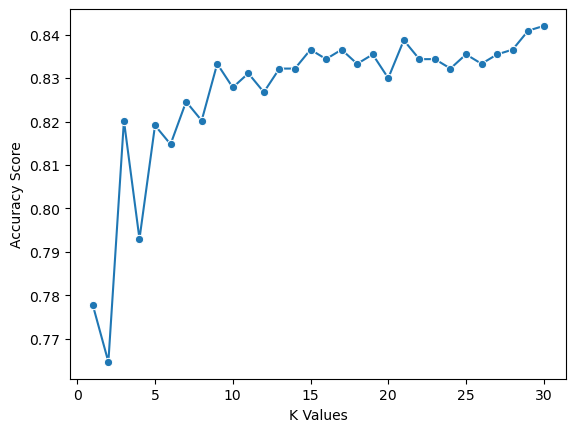

In [20]:
#plot the results
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")